In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset


In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Ecommerce (2).csv")

In [3]:
df.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           623 non-null    int64  
 1   Avg Session length    623 non-null    float64
 2   Time on App           623 non-null    float64
 3   Time on Website       623 non-null    float64
 4   Length of MemberShip  623 non-null    float64
 5   Yealy amount spent    623 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 29.3 KB


In [5]:
df.shape

(623, 6)

In [6]:
df.describe()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,312.000000,33.039429,12.001459,37.079018,3.514850,499.600023
std,179.988889,0.949071,0.996609,0.991753,0.948063,80.032965
min,1.000000,29.972300,9.273248,33.751071,0.891398,256.670000
25%,156.500000,32.375680,11.334163,36.376725,2.906558,447.665160
50%,312.000000,33.044399,11.998823,37.113631,3.504771,498.806136
75%,467.500000,33.700947,12.647695,37.773880,4.140305,551.257208
max,623.000000,35.744415,15.138317,40.808388,6.553916,775.337626


In [7]:
df.keys()

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent'],
      dtype='object')

In [8]:
df.isna().sum()

Customer ID             0
Avg Session length      0
Time on App             0
Time on Website         0
Length of MemberShip    0
Yealy amount spent      0
dtype: int64

# Visualizing Data using Seaborn library

In [9]:
import seaborn as sns

# Correlation

In [10]:
df.corr()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
Customer ID,1.000000,-0.036917,-0.001085,0.009227,0.052600,-0.075175
Avg Session length,-0.036917,1.000000,-0.001234,0.050231,-0.010919,-0.042764
Time on App,-0.001085,-0.001234,1.000000,0.040029,0.029839,-0.012348
Time on Website,0.009227,0.050231,0.040029,1.000000,0.036788,0.084305
Length of MemberShip,0.052600,-0.010919,0.029839,0.036788,1.000000,-0.030451
Yealy amount spent,-0.075175,-0.042764,-0.012348,0.084305,-0.030451,1.000000


<Axes: >

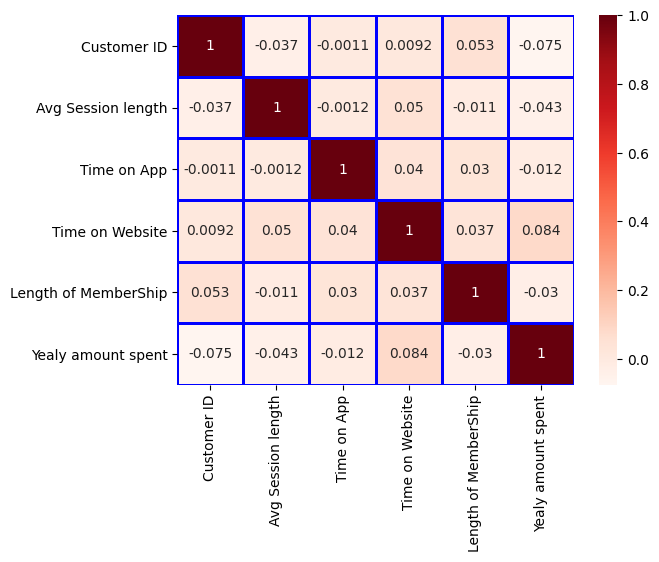

In [11]:
sns.heatmap(df.corr(), cmap='Reds',annot=True, linecolor='Blue', linewidths=1.0)

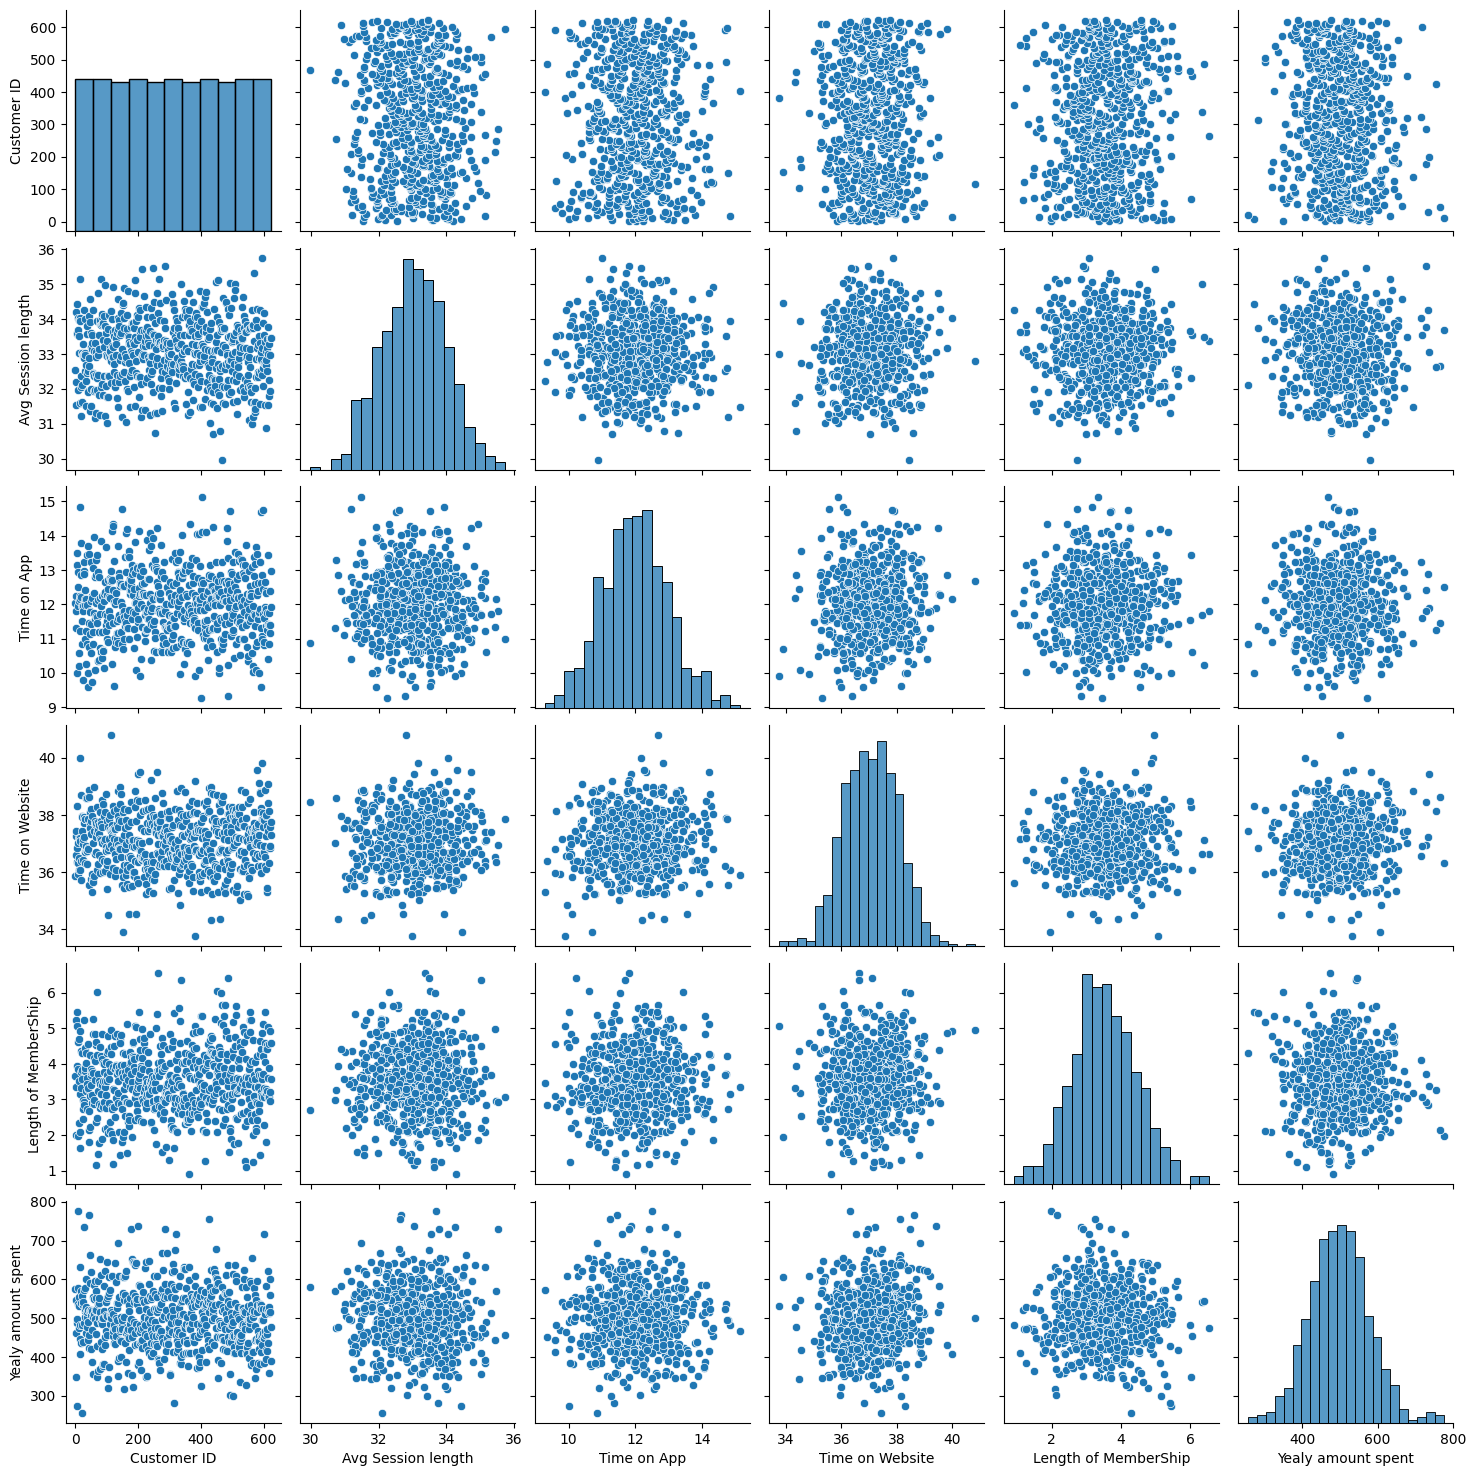

In [12]:
sns.pairplot(df)

# Separating the dataset  into features and target data

In [14]:
x= df.iloc[:,1:5]
y=df.iloc[:,5:6]

# feature data

In [15]:
x.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip
0,32.538350,12.028846,35.850540,3.648854
1,34.206718,12.226851,37.246443,1.987536
2,31.535240,11.814341,36.610697,3.351191
3,32.199577,11.295163,37.425695,5.234337
4,33.570137,13.500972,36.856165,3.938603


# target data

In [16]:
y.head()

,Yealy amount spent
0,576.098273
1,460.784955
2,349.739791
3,547.709921
4,487.055641


# Exploratory Data Analysis

In [17]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

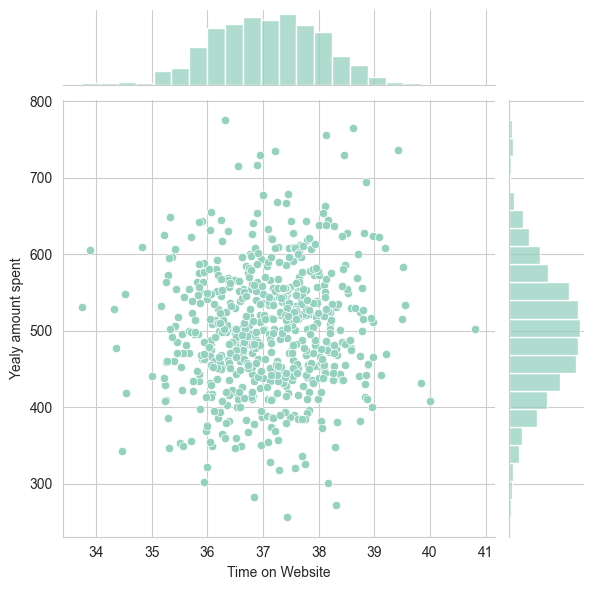

In [18]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yealy amount spent',data=df)

In [ ]:
sns.jointplot(x='Time on App',y='Yealy amount spent',data=df)

In [ ]:
sns.jointplot(x='Time on App',y='Length of MemberShip',kind='hex',data=df)

# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. features

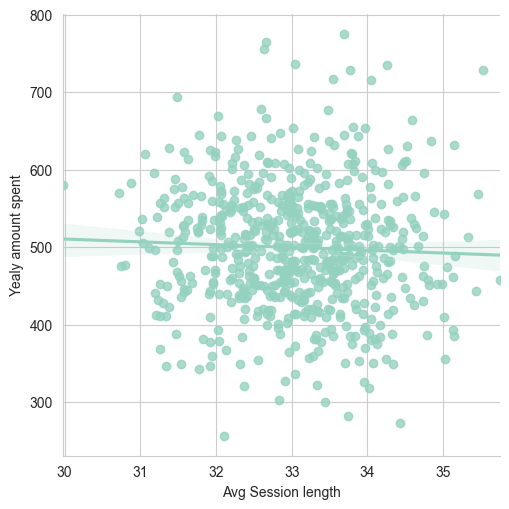

In [19]:
sns.lmplot(x='Avg Session length',y='Yealy amount spent',data=df)

In [ ]:
sns.lmplot(x='Time on App',y='Yealy amount spent',data=df)

In [ ]:
sns.lmplot(x='Time on Website',y='Yealy amount spent',data=df)

In [ ]:
sns.lmplot(x='Length of MemberShip',y='Yealy amount spent',data=df)

# Training and Testing Data

In [20]:
y = df['Yealy amount spent']

In [21]:
X = df[['Avg Session length','Time on App','Time on Website','Length of MemberShip']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-4.51809106 -2.48331385  9.2722127  -1.85871224]


# Predicting Test Data

In [30]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

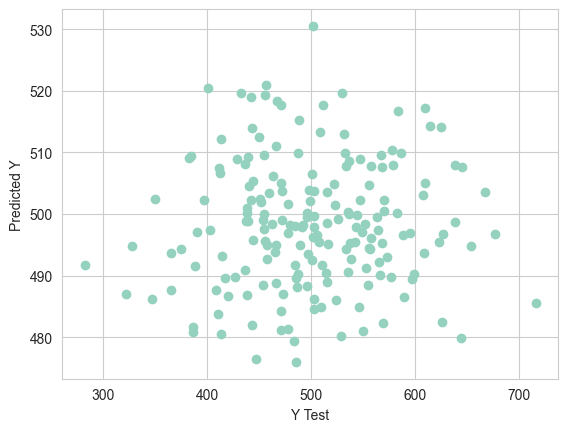

In [31]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Residuals

In [ ]:
sns.distplot((y_test-predictions),bins=50);
#import warning
#warning.filterwarnings("ignore")

# Conclusion

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=63) 

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
score = linreg.score(X_test,y_test)
print("Prediction Score of the model is:",score)

In [ ]:
plt.scatter(y_test,y_pred)
plt.ylabel("Y - Prediction")
plt.xlabel("Y - Test")
plt.title("y_test vs y_pred scatter plot")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

# using DTC and DTR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns

In [ ]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Ecommerce (2).csv")

In [ ]:
df.head()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df["Yealy amount spent"] = label_encoder.fit_transform(df["Yealy amount spent"])

In [ ]:
df.head()

In [ ]:
x= df.iloc[:,1:5]
y=df.iloc[:,5:6]

In [ ]:
df.Yealy amount spent.unique()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 60) #Model building

In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_split=5)
model.fit(x_train,y_train)

In [ ]:
tree.plot_tree(model)

In [ ]:
df.columns

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.Series(y_pred).value_counts()

In [ ]:
metrics.accuracy_score(y_pred,y_test)

# DTC using Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=5)
model_gini.fit(x_train, y_train)

#Prediction and computing the accuracy
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

In [ ]:
# Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
df.head()

In [ ]:
array = df.values
X = array[:,1:5]
y = array[:,5:6]

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state = 1)

In [ ]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

In [ ]:
#Find the mse
from sklearn import metrics
pred=model.predict(X_test)
metrics.mean_squared_error(y_test,pred)

In [ ]:
metrics.mean_absolute_percentage_error(y_test,pred)

In [ ]:
tree.plot_tree(model)

# SVM

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Ecommerce (2).csv")

In [ ]:
X = array[:,1:5]
y = array[:,5:6]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)

In [ ]:
model  = SVC(kernel= "rbf", gamma = 0.0001)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

# K-means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score as sil

In [ ]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Ecommerce (2).csv")

In [ ]:
df.head()

In [ ]:
def norm_fun(i):                                 #Normalization
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_new = norm_fun(df.iloc[:,1:])

In [ ]:
df_new

In [ ]:
model = KMeans(n_clusters=5)
model.fit(df_new)

In [ ]:
model.labels_

In [ ]:
df["lables"]=pd.Series(model.labels_)

In [ ]:
df.head()

In [ ]:
df.groupby(["lables"])["Customer ID"].apply(lambda x :tuple(x))

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
x,y = make_moons(100)
df = pd.DataFrame(x)
df.columns=["x1","x2"]
df["class"]= y

In [ ]:
df.head()

In [ ]:
plt.scatter(df.x1,df.x2,cmap=plt.cm.autumn)

In [ ]:
# KMEANS
model = KMeans(n_clusters=2,max_iter=600,algorithm="auto")
model.fit(df.iloc[:,:2])
plt.scatter(df.x1,df.x2,c=model.labels_,cmap=plt.cm.autumn)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import math

In [ ]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Ecommerce (2).csv")

In [ ]:
array = df.values

In [ ]:
x = array[:,1:5]
y = array[:,5]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
#model = DecisionTreeRegressor(max_depth = 3, min_samples_split = 5)
def mymodel(model):
    model.fit(x_train,y_train)
    return model
def makeprediction():
    dtr=DecisionTreeRegressor()
    model=mymodel(dtr)
    return model